# Character based cipher
Last update: 9 Feb 2021     

## Abstract
This paper documents an educational project that implements a cipher based on a four round Feistel structure and operates on characters instead of bits.  The character set is the English alphabet consisting of 26 letters, A to Z; all other characters and spaces are removed before processing.      

## 1) Introduction
The purpose of the paper is to document a coding project that implements a character based encryption scheme.  This is an educational project for exploring aspects of the Feistel structure.  The code developed here is not intended to implement a secure encryption scheme, only to explore and document some interesting aspects of encryption.  The code will take as plaintext input, blocks of text consisting of characters A to Z, and output ciphertext blocks, also consisting of characters A to Z.  The code will strip any non-alpha characters from the input text before encipherment.  

Encryption is the process of encoding information which converts the original information, known as plaintext, into an alternative unreadable form, known as ciphertext.  The ciphertext is what is transmitted to prevent third parties or the public from reading private messages [1].  

In December 2020, the Zodiac cipher, Z340, was solved after more than 51 years and a very interesting YouTube video on the solution was published [2].  The solution to solving the cypher was a combination of brute force and hill climbing.  The cypher was meant to be eventually decoded, otherwise why would the Zodiac send it?  But the cypher turned out to be very difficult and the solution involved lots of computer time employing random trials.  As bits of the message were uncovered, these were used as clues to help solve the remaining message.  

Zodiac’s first cypher was solved on August 8, 1969, by Donald and Betty Harden of Salinas, California. David Oranchak has a very interesting video on the history and solution of this cipher [3]. The first cipher, given the name, Z408, since there were 408 characters in the message.  The cipher was divided into three parts and each part was sent to a different newspaper.  Each part of the cipher had 17 columns and 8 rows of symbols for a total of 408 symbols.  54 different symbols were used in the message.  The key for the solved cipher had some letters encoded by different symbols, which is called substitution with suppression of frequencies.  Since individual letter frequencies were suppressed, Donald and Betty focused on double symbols in the cipher and they looked for a four letter pattern that would fit the word KILL.  Eventually they solved the Z340 cipher and sent their solution to the newspaper, who passed the solution onto the police.
  
<img src='Z408 hand drawn.jpg' width="400"/>   
Figure 1: The solution key to the Z408 cipher.  

The second cypher, Z340, was 340 symbols long with 63 different symbols.  Both the Z408 and the Z340 ciphers were extensively studied with the thought that some clues from the Z408 solution could be used to solve the Z340 cipher.  Eventually, by trial and error, it was suspected that the symbols in the Z340 cipher might be interleaved somehow (a transposition scheme). David Oranchak's video on the Z340 describes the solution to the cipher.     
  
<img src='Z340 hand drawn.jpg' width="400"/>  
Figure 2: The solution key to the Z340 cipher.   

The Zodiac wanted the Z340 to be harder to decode, but did he suspect that it would remain unread for so long?  

There are other well known examples of ciphers that operate on characters.  The Playfair[4] and the German Enigma[5] are examples of character based cyphers.  These ciphers were used prior to the modern computer era.  

The Playfair cipher encrypts pairs of letters and is harder to break than simple substitution ciphers.  This is because frequency analysis does not work with this cipher.  Breaking the cipher by hand required a lot of work, however, by using modern computers and using a shotgun hill climbing method, the cipher can be broken quickly.  

The German Enigma is a cipher that uses a typewriter based machine to encode and decode the messages.  Each press of the keyboard causes the machine state to advance and implement a polyalphabetic substitution cipher.  Polish, British and eventually American cryptographers spent considerable effort during World War II to break the German Enigma.   

Watching David Oranchak's video on the solution of the Z340 got me interested in looking at cyphers.  In this programming project, we are not going to invent a new cipher.  We are going to use the well known Feistel network and use some ideas from the Data Encryption Standard [6][7], modified to operate on characters instead of binary data.

The goal of this programming project is to design a character based cipher based on four rounds of a Feistel network.  It would not be considered secure by present day standards.  The cipher is not designed to be computationally efficient.  

A cryptogram is a type of puzzle that consists of a short piece of encrypted text.  The cipher presented in this project could be used to generate cryptograms, however, I think such a cryptogram would be almost impossible to break by hand.  Later I will present an analysis of the cipher and some comments on attacking it.    

The Feistel network is a data flow map which can be used to construct a block cipher[8].  The cipher structure is named after the German-born physicist and cryptographer Horst Feistel who did pioneering research while working for IBM and several well known ciphers use the Feistel network.  In most implementations binary data is processed as bits, but in this project, characters will be processed as the unit of information.  The Figure 3, below shows the Feistel network.

<img src='Feistel network 4 round.jpg' width="400"/>  
Figure 3: Feistel cipher diagram

The input data is divided into blocks, which are divided into half blocks, Left and Right.  The Right half block is passed through the function RF(), called the round function, and then XOR'ed with the Left half block.  As shown in the Figure, there is an additional application of the XOR and RF().  The Left and Right outputs when combined is the encrypted data block.  The Feistel network is invertible, even if the round function is not itself invertible.
   
The round keys, k0, k1, k2 and k3, shown in Figure 3, are derived from the encryptiopn key.  The generation of the round keys is called the key schedule and is explained below.     

**Scope**  
The cipher presented in this paper is not designed to be secure by modern standards.  The purpose of the project is to explore selected aspects of cryptography.  Cryptography is heavily based on mathematical theory and computer science practice, in this paper I will not be offering any mathematical proofs.  A second goal of the project is to test the use of JupyterLab as a medium to write a technical paper.

**Contents**  
2. [Preliminaries](#section2)
3. [Design](#section3)
4. [Test message](#section4)
5. [Algorithm analysis](#section5)
6. [Security Analysis](#section6)  
7. [Conclusion](#section7)
8. [References](#section8)

The following python libraries are used in this notebook.   
- Collections: a python module that supplies different types of containers for access and iteration
- Counter: used to keep the count of the elements
- itertools: a python module that provides functions that work on iterators
- pickle: a python library that allows for the storage of objects.
- sys: The sys module provides functions and variables used to manipulate different parts of the Python runtime environment.
- NumPy: a python library used for working with arrays
- chisquare: The chi-square library
- Matplotlib: a library for creating graphs and plots  
- Sympy: SymPy is a Python library for symbolic mathematics.

**Revisions**  
- 1/22/2021: Reorganized from one notebook to multiple notebooks.  Now there are notebooks for Algorithm analysis, CT attack, PT attack and N-gram analysis.  Files were getting big and some were taking too long to load. 
- 1/25/2021: Around this time, moved several functions to myModule.py.  
- 1/28/2020: Changed the name of the Feistel function to Round function RF(), since the round function term is more common.  Will need to update the figures with the function name change.
- 1/29/2021: Moved round function properties to a new notebook.
- 1/30/2021: Added IV parameter to encrypt_CBC and decrypt_CBC.
- 2/3/2021: Changed subkey generation, now diffused together.  This reduces sensitivity of partial correct left side key. Explored alternate Mixer matrix.
- 2/4/2021: Making additional changes to subkey generation.  Added subkeys k2 and k3, to do key mixing at end of 2nd round.  This keeps internal states from being visible.  Work on this continued for several days.
- 2/8/2021: Added code to generate mixer matrix from polynomial, documented changes to S-Box following design criteria of AES.  Still need to research choice of polynomial, for now, arbitrary coefficients.  Removed 90% key analysis and Reduced complexity analysis from CT analysis.  Key error sensitivity showed that all characters of key are usually needed for successful decryption.  Reduced complexity analysis was deleted after working on PT attack since it didn't fit with the current narration. Removed unimodular discussion from round function properties.
- 2/11/2021: Added the function gen_round_keys() to myModule.py.  Included comments in narrative about key schedule. Investigated sensitivity to one character change in the PT message.  Wrote 4 round encrypt/decrypt function.  Thinking about rewriting report to implement 4 rounds, since 4 rounds seems to remove sensitivity to one character change in the message and 90% correct key.  Changes made to use 4 rounds in the cipher algorithm.
- 2/13/2021: Made changes and updates to round function properties notebook.
- 2/17/2021: Rewrithing Cipher and Plain text analsys sections to follow the analysis presented in NIST light weight cipher papers.  Renamed files from Ciphertext attack to Security Analysis and removing plaintext attack.  These are combined in the Security Analysis notebook.
- 2/21/2021: Fixed standard deviation calculations, doing calculations on histogram values is not correct, instead looking at variance of letter frequencies.  

**ToDo:**  
- ~~finish summary, for now TBD~~
- ~~finish documentation of ECB and CBC modes~~
- ~~finish narration for S-Box and Mixer~~
- spell check
- ~~correct usage from FF() to RF()~~
- correct and update figures
- post paper to github
- ~~add reference to AES~~  
- finish last updates to narration, this notebook and others. remove old code and comments.

In [1]:
from collections import Counter
import itertools
import pickle
import sys
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt
from sympy import poly, simplify, collect, poly_from_expr, symbols, degree, Matrix, Mod, invert

## 2) Preliminaries <a id="section2"></a>
This section of the paper will cover some preliminary topics that are required for the operation of the cipher.  Since this paper also contains python code, there are variables, functions and data that need to be declared first.  These are described in greater detail in the various subsections.  

The block size in this implementation is 16 characters long and the total character count is padded to bring the total length of the message to a multiple of the block size.  

- 2.a) [Test message](#section2a)
- 2.b) [Letter frequency](#section2b)
- 2.c) [Character encoding for processing](#section2c)  
- 2.d) [Key generation](#section2d)
- 2.e) [Character XOR](#section2e)
- 2.f) [Mixer matrix](#section2f)
- 2.g) [S-box](#section2g)
- 2.h) [P-table](#section2h)
- 2.i) [Key schedule](#section2i)
- 2.j) [Round function](#section2j)


### 2.a) Test message <a id="section2a"></a>
The test message for this project is the English translation of the first chapter from Julius Caesar's account of the Gallic Wars [9][10].  In Latin, it begins with "Gallia est omnis divisa in partes tres", meaning "All Gaul is divided into three parts".  After the text file is read into memory, all the non-letter characters (numbers, spaces and punctuation) are removed and all letters are converted to uppercase.  Then the message is padded to make the length equal to an even multiple of the block length. The test message then consists of a list of uppercase letters without spaces between the words.

All the spaces and punctuation are removed to reduce the message to just the essential elements.  Upper case was used to make the message look more crypto-like.  There is a sculpture located on the grounds of the Central Intelligence Agency (CIA) in Langley which has four encrypted messages, in all capital letters [11].       

Chapter 1 of Caesar's Gallic Wars was chosen as the test message in a nod to the cipher named after him.  A simple substitution cipher is sometimes called a Caesar cipher.  Each letter in the plaintext is replaced by a letter with some fixed number of positions down the alphabet [12].

The following code reads in the test message and does the conversion and padding as described.

In [2]:
# open the test message
message = open('Commentarii_de_Bello_Gallico.txt', 'r').read()

In [3]:
# print the test message
string = message
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

All Gaul is divided into three parts, one of which the Belgae inhabit, the 
Aquitani another, those who in their own language are called Celts, in our 
Gauls, the third. All these differ from each other in language, customs and
 laws. The river Garonne separates the Gauls from the Aquitani; the Marne a
nd the Seine separate them from the Belgae. Of all these, the Belgae are th
e bravest, because they are furthest from the civilization and refinement o
f our Province, and merchants least frequently resort to them, and import t
hose things which tend to effeminate the mind; and they are the nearest to 
the Germans, who dwell beyond the Rhine, with whom they are continually wag
ing war; for which reason the Helvetii also surpass the rest of the Gauls i
n valor, as they contend with the Germans in almost daily battles, when the
y either repel them from their own territories, or themselves wage war on t
heir frontiers. One part of these, which it has been said that the Gauls oc
cupy, takes 

In [4]:
# remove non-letter characters and convert to uppercase
PT = ''.join(e for e in message if e.isalpha()).upper()

In [5]:
# pad the message size to get to even multiple of the block size
block_size = 16  # must be an even number, since half blocks are used later
tail_size = block_size - (len(PT) % block_size)
if tail_size == block_size:
    tail_size = 0
print('number of characters to pad the message: ',tail_size)

number of characters to pad the message:  2


The tail consists of a few characters appended to the end of the message to bring the total message length up to and even multiple of the block size.  Morse code uses the prosign AR as the end of message, so a string of ARARAR...AR could be used.  Or a string of X's or Z's could also be used.  Here I chose to use the alphabet ABC...Z.  

In [6]:
tail = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'  # this could also be from a set of random characters unique to each message
PT = PT + tail[0:tail_size]  # append necessary number of characters to end of the message
print('new message length with tail: ',len(PT))
print('number of message blocks: ',len(PT)/block_size)

new message length with tail:  1232
number of message blocks:  77.0


In [7]:
# print the converted test message
string = PT
length = 75 # number of characters to print per line
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

#### Optional transposition of characters
At this point some additional confusion could be added to the encipherment process by preprocessing the plaintext.  The PT is a list of characters which could be formulated as an array, then some interleaving and or transposition of the characters could be easily done.  For example:  Convert the plaintext to an array of 1 by n, where n is the number of blocks.  Each row is an array of characters of length block_size. 

In [8]:
A = np.reshape(np.asarray(list(PT)), (-1, block_size))
print(A)

[['A' 'L' 'L' ... 'D' 'E' 'D']
 ['I' 'N' 'T' ... 'S' 'O' 'N']
 ['E' 'O' 'F' ... 'L' 'G' 'A']
 ...
 ['T' 'L' 'O' ... 'T' 'H' 'E']
 ['S' 'E' 'T' ... 'U' 'N' 'A']
 ['N' 'D' 'T' ... 'R' 'A' 'B']]


Transpose the characters from rows to columns.

In [9]:
B = np.copy(A)  # make a copy of B
B = np.reshape(B, (block_size,-1))

# transpose the elements
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        B[j][i] = A[i][j]
print(B)

[['A' 'I' 'E' ... 'T' 'S' 'N']
 ['L' 'N' 'O' ... 'L' 'E' 'D']
 ['L' 'T' 'F' ... 'O' 'T' 'T']
 ...
 ['D' 'S' 'L' ... 'T' 'U' 'R']
 ['E' 'O' 'G' ... 'H' 'N' 'A']
 ['D' 'N' 'A' ... 'E' 'A' 'B']]


In [10]:
str1 = '' # initialize an empty string 

# traverse in the string   
for ele in B.flatten().tolist():  
    str1 += ele

# print the test message
string = str1
length = int(len(PT)/block_size) #77
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

AIEEAHUTHENAAHUDEAESFIFVSRMWIHTWNENSSORTMWPOTRSHDUNOTHRGNUIIOBHRHRKNUOEOTHTSN
LNOINOASIRLNREITTELTUVIILEPHNEOEECGOOFAHOHEWHOOITPINHEIATAINWEEOEITDIMTUPILED
LTFNIIGIRFADOGTHHOGBRINNESOIAYTLWOWNSTSTSELNENNCHYNEEOTEHNUEALEFLVOTTTONACOTT
GOWHANENDRNLNAAEEFAETLECAORCTAHLINATUHTHTNTTMTEHATGIRCOIEIPARGXGOEWHAHTTRHOTH
ATHANTAOAOGANUNSMAECHIMESRTHEREBTTRHREHEDTHESHPITAATIERTSAONDATAWRAENEHATIKIE
UHIBOHRULMUWELIEFLAAEZEATTTTTEGEHIFEPGEGAHEREEATTKTIVAIBINNDTERUERRRIREIOSSNN
LRCITEERLEASSSTIRLRUSANNFTHEHTEYWNOHAAYEIEMRLIRHHETSENEODDTSHRELRHDIAIPNFNBGO
IEHTHICGTAGTEFHNOTESTTTDROONEHROHURESUCRLYFIVRTAESHBRASRETHTEIMEPITSEVYSTEEOR
SETTERAAHCEHPREEMHTEFIOMETSDMEMNOAWLSLOMYERTEFOSGIEOGNODOHERNSEXANHIXERAHATFT
DPHHROLUEHCEAOMSTEHTROFEQHETINADMLHVTSNABIOOSRFBATRUADFEFEREOEFTREENTRENERWTH
IAEETWLLSOURRMAEHSEHONORUETONENTTLIEHITNATMRWOTEUSINRTTRTHITRSRETANGEGNDOSEHS
VRBAHNESETSIATRPEEBEMAUCEMHEDASHHYCTENESTHTIANHELBVDOHHSHEVCTFONONOSNAATCPEET
ITEQOLDTDHTVTHNABTRYTNRHNAIFARWEEWHIRVNITEHEGTENSEEENEETELEHHRND

Now if you read down the columns, the message is correct.  If you encipher across the rows, none of the letters in the words are adjacent and the n-gram relation is hidden.  

Other complications are possible:   
1) For example, if the message is padded so that the message can be reshaped into square arrays, then the message could be re-arranged along the diagonal.  Also, the order of the characters could be reversed before encipherment.

2) The cipher block size is 16 characters, which could be arranged in a 4 by 4 array and the order permuted among the rows and columns prior to the round function.  

3) Could compress the message, convert the binary result to ascii characters by using special alpha encoding and then encrypt.

### 2.b) Letter frequency <a id="section2b"></a>
The following code calculates the letter frequency in the test message.  Later in this paper we will see that the letter frequency is altered by the encryption.  Examining the letter frequency often can provide clues to the solution of a cryptogram.  This is especially true for substitution ciphers.  If the letter and bigram frequency in a message is not hidden, modern computer aided techniques can crack the cipher very quickly.

The following code graphs the letter frequency and bigram frequency of the test message.  

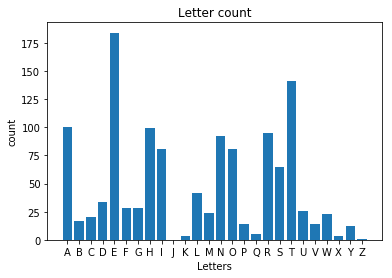

In [11]:
# using collections.Counter() to count of each element in string  
mgram = Counter(PT) 
mgram['J'] = 0  # enclude missing letter J
sorted_dict = {key: value for key, value in sorted(mgram.items())}

# plot the histogram of the letter count
plt.bar(range(len(sorted_dict)), sorted_dict.values(), align='center')
plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.title('Letter count')
plt.ylabel('count')
plt.xlabel('Letters')
plt.show()

In [12]:
print('variance of letters in the message is: {:.2f}%'.format(100*np.var(np.array(list(mgram.values()))/(len(PT)/26))))

variance of letters in the message is: 98.55%


The graph above shows that in the test message, the letters E and T are the most frequent.  The primary weakness of a simple substitution cipher is that the frequency of the letters are not altered and the letters A, E and T can be easily guessed.

Later we will see that the variance of the letter frequency is much reduced after encryption.   

#### Chi-squared Statistic
The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies.  The two sets of frequencies we are looking at are the letter frequencies of the message and the letter frequencies in normal english.

A small chi square value means that letter frequencies of the message are strongly related to the letter frequencies in normal english.  A large chi square value means that the two frequencies are not well related.

The p value is a measure of the goodness of the statistics being compared.  Many fields of science use 0.05 as the  threshold of significance, however in cryptography the common thrshold for the p-value is 0.01 [21].  In cryptanalysis, the chi-squared test is used to compare the distribution of plaintext and (possibly) decrypted ciphertext. The lowest value of the test means that the decryption was successful with high probability.

In [13]:
f_obs = np.array(list(sorted_dict.values()))  # values from the mgram

In [14]:
# English single letter frequencies, in percent %
en_letter_freq = {'A':8.55, 'B':1.60, 'C':3.16, 'D':3.87, 'E':12.10, 'F':2.18, 'G':2.09, 'H':4.96,                
    'I':7.33, 'J':0.22, 'K':0.81, 'L':4.21, 'M':2.53, 'N':7.17, 'O':7.47, 'P':2.07,
    'Q':0.10, 'R':6.33, 'S':6.73, 'T':8.94, 'U':2.68, 'V':1.06, 'W':1.83, 'X':0.19, 'Y':1.72, 'Z':0.1 }

In [15]:
f_exp = np.array(list(en_letter_freq.values())) * np.array(list(sorted_dict.values())).sum()/100

In [16]:
chi_value, pvalue = chisquare(f_obs, f_exp=f_exp)
print('chisquare value: {:.2f}, pvalue: {:.3e}'.format(chi_value,pvalue))

chisquare value: 97.98, pvalue: 1.373e-10


Observation: Comparing the unencrypted test message letter frequencies to normal English letter frequencies, we get a chisquare value of 97.98.  Chisquare values for non matching distrobutions are generally above 1000, so for this project, any value below 200 is being used as the threshold for distrobutins that match English.  Since the p-value is less than 0.01 and the Chisquare value is less than 200, we can conclude that the test message is probably normal English and not encrypted or gibberish.  

#### Bigrams
Common two letter combinations are called bigrams.  The frequency distribution of bigrams for the english language is well known and can be used to help in the solution of simple substitution ciphers [13].

The code below counts the bigrams in the test message and displays a histogram of frequency.  

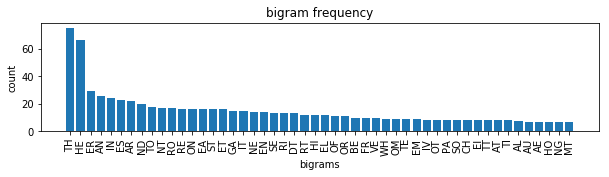

In [17]:
# count double characters, starting at beginning of text 
bigram = Counter(PT[idx : idx + 2] for idx in range(len(PT) - 1)) 

# count double characters, starting at 2nd letter of text 
bigram2 = Counter(PT[idx : idx + 2] for idx in range(1,len(PT) - 1)) 

bigram.update(bigram2) # combine groups
bigram = {k: v / 2 for k, v in bigram.items()} # divide values by 2
bigram_sorted = dict(sorted(bigram.items(), key=lambda item: item[1],reverse=True))

# slice out the first 50 fro plotting
bigram_sorted_sliced = dict(itertools.islice(bigram_sorted.items(), 50))

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)

plt.bar(range(len(bigram_sorted_sliced)), bigram_sorted_sliced.values(), align='center')
plt.xticks(range(len(bigram_sorted_sliced)), list(bigram_sorted_sliced.keys()))
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x')
plt.title('bigram frequency')
plt.ylabel('count')
plt.xlabel('bigrams')
plt.show()

The above graph shows that the most common letter pairs are TH and HE, which really stand out in the plot.


### 2.c) Character encoding for processing <a id="section2c"></a> 
In computers, letters and other symbols are encoded for electronic communication.  Historically, one of the first methods for encoding letters and numbers was Morse code.  Morse code was and still is used for sending messages over radio waves, but not as much on telegraph wires.  This type of encoding was used for the efficient transfer of information and not for encryption of the data.  

The test message is encoded as ASCII characters within the computer file [14].  The capital letter A is the decimal number 65, B is 66 and so on, all the way to Z, which is 90.  Thus the capital letters of the alphabet are encoded as the numbers 65 to 90.  For processing, the code below subtracts 65 from the decimal representation to encode the characters as numbers that range from 0 to 25, thus A=0, B=1, ..., Z=25.        

The first step is to convert the text message from ASCII values to an array of numbers, where A=0, B=1, ..., Z=25.  The following lines of python do that.  Additionally, the numbers in the array are of data type unit8, which means that all the numbers in the array are 8 bit unsigned integers.  This is important to note since some of the mathematical operations on the data will be automatically performed as unsigned 8 bit integers. 

In [18]:
# map characters to numbers, A=0, B=1, ..., Z=25
PT_int = np.asarray(list(PT),dtype='|S1').view(np.uint8) - ord('A')
PT_int

array([ 0, 11, 11, ..., 17,  0,  1], dtype=uint8)

As can be seen above the first number in the message array is 0, which corresponds to the letter A and is the first letter in the message.  The next two numbers are 11 and 11, which correspond to the letters L, so the first word in the message is ALL when converted to an array of numbers.  

### 2.d) Key generation <a id="section2d"></a> 
The input key string can be any length using any characters.  The input key string is however stripped of all non-letter characters and converted to upper case.  In this example, the names of common animals are used to make the password.  Only 16 characters are used.  Additional comments about key length and choice of the letters used in the key will be provided in the algorithm analysis section below.  Best practice for key generation would be to randomly generate characters for the key.  

The following code takes the key string and converts it to an all capital text string of length block size.

In [19]:
# generate subkeys from text string
key_string = 'elephantzebratigermonkeylion'
print('input key string: ',key_string)
print('input key string length = {:d}'.format(len(key_string)))
key_alpha_caps = ''.join(e for e in key_string if e.isalpha()).upper()[0:block_size]
print('key as alpha caps trimmed to block size: ',key_alpha_caps)

# only use the right most characters equal to block size
key = (np.asarray(list(key_alpha_caps),dtype='|S1').view(np.uint8) - ord('A'))[0:block_size]

input key string:  elephantzebratigermonkeylion
input key string length = 28
key as alpha caps trimmed to block size:  ELEPHANTZEBRATIG


### 2.e) Character XOR <a id="section2e"></a> 
One of the operations needed for typical encryption algorithms is the Exclusive Or (XOR) function. The XOR logic function normally operates on individual bits.  Bit wise XOR will return the same value if the operation is repeated twice and this property is used in many encryption algorithms.  

In this project, characters are the unit of information, similar to bits in a computer.  The characters are encoded as numbers ranging from 0 to 25, modulo 26 addition is going to be used in place of XOR function.  Since modulo addition does not have the property of returning the starting result when repeated twice, we also need an inverse character XOR function, which is implemented as modulo 26 subtraction.

The function names char_xor() and inv_char_xor() are called in the algorithm where XOR would usually be used, so to make the code a bit more readable, these names are used, even though they implement modulo addition and subtraction, not bitwise XOR.  

The character XOR and the inverse function are described in myModule.py.

### 2.f) Mixer matrix <a id="section2f"></a> 
The Mixer is a matrix used to mix multiple characters in the input vector across multiple inputs to the S-Boxes by a matrix multiplication operation.  Without the Mixer matrix, the S-box output character would only depend on its corresponding input character and there would exist a one to one correspondence.  By using the Mixer matrix, changing one character in the half-block causes multiple characters in the S-box output to change.  This cascade feature is a desirable feature in the DES S-box.  In this project this is implemented with the mixer matrix. 

The Mixer matrix is not a part of the DES round function.  However, within the DES S-Box, 6 bits are used as inputs to each DES S-Box and the outer bits together with the four inner bits are as coordinates into a look up table for the corresponding 4 bits of output.  The effect is that a group of bits is used to determine the output group of bits.  

Using this same idea, of a many to one relationship, the mixer matrix was first implemented as an N by N matrix with arbitrarily chosen element values.  Later the Mixer matrix design was changed and now the design steps of the AES mixer are used to generate the matrix [15].

In [20]:
# declare the following symbols
x, b7, b6, b5, b4, b3, b2, b1, b0 = symbols('x b7 b6 b5 b4 b3 b2 b1 b0')

The Mixer matrix construction is similar to the Rijndael MixColumns.  A 7th order polynomial was selected and additional research is needed for the selection of the coefficients.  The following prime numbers were arbitrarily chosen as coefficients for a(x): 7, 1, 5, 1, 3, 1, 2 and 1.   The polynomial b(x) is also declared.

In [21]:
a = poly(7*x**7 + x**6 + 5*x**5 + x**4 + 3*x**3 + x**2 + 2*x + 1)
#a = poly(7*x**7 + x**6 + 5*x**5 + x**4 + 3*x**3 + x**2 + x + 2) # test this one at some point
#a = poly(17*x**7 + 13*x**6 + 11*x**5 + 7*x**4 + 5*x**3 + 3*x**2 + 2*x + 1) # test this one at some point
b = poly(b7*x**7 + b6*x**6 + b5*x**5 + b4*x**4 + b3*x**3 + b2*x**2 + b1*x + b0)

The polynomials a and b are multiplied and the coefficients of c are extracted.

In [22]:
c = a * b
c_expr = c.as_expr()

The product of a(x) and b(x) is c(x) is a 14-term polynomial.  This is reduced to a 8 term polynomial by doing the multiplication modulo $(x^{8}+1)$.  The powers of each term are reduced by following: $x^{i}{\bmod {\left(x^{8}+1\right)}}=x^{i{\bmod {8}}}$.  Reducing each term i mod 8, by substituting $x^0$ for $x^8$ etc. The affected coefficients are now summed together.

In [23]:
# substituting powers greater than 8 for 0 to 6
d_expr = c_expr.subs({x**8:x**0, x**9:x**1, x**10:x**2, x**11:x**3, x**12:x**4, x**13:x**5, x**14:x**6})

d_poly = poly(d_expr) # converting to a polynomial object

# display the coefficients
for i in range(degree(d_poly)+1):
    print(' coef of exp=',i,', is:',d_expr.coeff(x,i))

 coef of exp= 0 , is: b0 + 7*b1 + b2 + 5*b3 + b4 + 3*b5 + b6 + 2*b7
 coef of exp= 1 , is: 2*b0 + b1 + 7*b2 + b3 + 5*b4 + b5 + 3*b6 + b7
 coef of exp= 2 , is: b0 + 2*b1 + b2 + 7*b3 + b4 + 5*b5 + b6 + 3*b7
 coef of exp= 3 , is: 3*b0 + b1 + 2*b2 + b3 + 7*b4 + b5 + 5*b6 + b7
 coef of exp= 4 , is: b0 + 3*b1 + b2 + 2*b3 + b4 + 7*b5 + b6 + 5*b7
 coef of exp= 5 , is: 5*b0 + b1 + 3*b2 + b3 + 2*b4 + b5 + 7*b6 + b7
 coef of exp= 6 , is: b0 + 5*b1 + b2 + 3*b3 + b4 + 2*b5 + b6 + 7*b7
 coef of exp= 7 , is: 7*b0 + b1 + 5*b2 + b3 + 3*b4 + b5 + 2*b6 + b7


In [24]:
# get the coefficient of x^0
f0 = d_expr.coeff(x,0)

# convert f0 to a poly of x, with b0=x^0, b1=x^1, etc.
p = poly(f0.subs({b0:x**0, b1: x**1, b2: x**2, b3:x**3, b4: x**4, b5: x**5, b6:x**6, b7: x**7}))

py = np.array(p.all_coeffs())
print(py)

[2 1 3 1 5 1 7 1]


The coefficients of b7 through b0 are: 2,1,3,1,5,1,7,1 and these are the elements of the first row of the Mixer matrix.  The Mixer matrix is a circulant matrix, so the other rows are right rotated versions of the first row.

In [25]:
#py = np.array([2,1,3,1,5,1,7,1]) # using 2,1,3,1,5,1,7,1 from above
Mixer = np.array([
    np.roll(py,0),
    np.roll(py,1),
    np.roll(py,2),
    np.roll(py,3),
    np.roll(py,4),
    np.roll(py,5),
    np.roll(py,6),
    np.roll(py,7)
    ],dtype=np.uint8)

In [26]:
print('determinate of the Mixer matrix: {:.1f}'.format(np.linalg.det(Mixer)))

determinate of the Mixer matrix: 1535625.0


In [27]:
print(Mixer)

[[2 1 3 1 5 1 7 1]
 [1 2 1 3 1 5 1 7]
 [7 1 2 1 3 1 5 1]
 [1 7 1 2 1 3 1 5]
 [5 1 7 1 2 1 3 1]
 [1 5 1 7 1 2 1 3]
 [3 1 5 1 7 1 2 1]
 [1 3 1 5 1 7 1 2]]


The data type for the Mixer matrix is $\text{uint8}$, the result of the matrix multiplication is $\text{modulo }2^8$, then the final result is $\text{modulo }26$.  The Rijndael MixColumns is a maximum distance separable matrix [16]. I have not determined if the Mixer matrix is also maximum distance separable as composed. Since the determinant of the Mixer matrix is not equal to $\pm1$, it is a non-unilateral matrix, therefore no integer inverse matrix exists as show below.  

In [28]:
Matrix(Mixer).inv()

Matrix([
[-872/6825,    -1/273,  407/2275,    -1/273,  -53/6825,    -1/273,   43/2275,    -1/273],
[   -1/273, -872/6825,    -1/273,  407/2275,    -1/273,  -53/6825,    -1/273,   43/2275],
[  43/2275,    -1/273, -872/6825,    -1/273,  407/2275,    -1/273,  -53/6825,    -1/273],
[   -1/273,   43/2275,    -1/273, -872/6825,    -1/273,  407/2275,    -1/273,  -53/6825],
[ -53/6825,    -1/273,   43/2275,    -1/273, -872/6825,    -1/273,  407/2275,    -1/273],
[   -1/273,  -53/6825,    -1/273,   43/2275,    -1/273, -872/6825,    -1/273,  407/2275],
[ 407/2275,    -1/273,  -53/6825,    -1/273,   43/2275,    -1/273, -872/6825,    -1/273],
[   -1/273,  407/2275,    -1/273,  -53/6825,    -1/273,   43/2275,    -1/273, -872/6825]])

### 2.g) S-box <a id="section2g"></a> 
The S-box is a matrix which is used to perform substitution.  The concept and use of a S-box is well known in block ciphers.  According to Wikipedia [17], the purpose of the S-box is to hide the relationship between the key and the ciphertext. The goal was to make the S-box act as a nonlinear function, so that the output cannot be expressed as a linear equation, i.e. a straight line ($y = mx+b$).  There are two well known examples of S-boxes.  The first is used in the Data Encryption Standard (DES) [18] and the second is used in the Advanced Data Encryption Standard (AES) [19].  The S-box implemented here loosely follows the DES S-box.

In the code below, S0, S1, ... S7 are arrays that consist of the numbers 0 to 26 in different random orders. S0, S1, ... S7 are combined into a matrix for processing within a For loop.   The input data is used as an index to S0, for example, and the value returned is some new value.   The matrix of S0, S1, ... S7 is the two dimensional array called s_box.  

Each character $a[i]$ is replaced by $S[j][a[i]]$ using $a[i]$ as the index.

$a_i = S[j][a_i]$  
where $a_i$ are the elements of $X_j$   

Elements of the S-Box were generated as a random shuffle of the set $[0..25]$.  The the order of the terms was adjusted by hand to avoid fixed points, $S(a_{j,i})\neq a_{j,i}$ and opposite fixed points, $S(a_{j,i}) \neq {a_{j,i}^{-1}\text{ mod } 26}$. 

In [29]:
# generator code
s = np.arange(0,26)
np.random.shuffle(s)
print(s)

[ 5 10 19 18 25 21 17 15  0 16 24  9  6  4  7  1 11 23 20 13  3  2 14 22
 12  8]


The generator code is run a number of times to make up the values for the arrays.  These values are copied by hand into the arrays below one time and hard coded.  There is nothing special about the order of numbers in the array, they are just random.  Then two checks were run looking for derangement and opposite fixed points as described above and if required, adjustments were made in the S-Box to prevent these cases.

In [30]:
S0 = np.array([17,  5,  24, 2, 15, 10, 21,  13, 25, 19,  1, 20, 8,  0,  7, 16, 23,
        6,  4, 22,  9, 12, 11, 14, 18,  3],dtype=np.uint8)
S1 = np.array([22,  3, 10, 17, 20, 23,  5, 15, 18,  7, 16, 19, 21,  6,  9,  4, 12,
       25, 13, 11,  8,  2,  1, 24,  0, 14],dtype=np.uint8)
S2 = np.array([19, 11, 24, 21, 18,  8, 14, 16,  9, 12,  7, 22, 17,  3,  4, 20,  5,
       25, 10, 23, 15,  2,  1, 13,  0,  6],dtype=np.uint8)
S3 = np.array([ 1, 23, 13,  0, 10, 18, 25, 20,  2,  6, 14, 19,  5, 24, 16, 17,  8,
        4, 22, 15,  3, 12, 11,  9, 21,  7],dtype=np.uint8)
S4 = np.array([19, 25, 17,  2,  8, 10, 15, 16, 13,  6,  0, 24,  9,  4, 20,  7, 18,
       11,  1, 12, 22, 23, 14, 21,  5,  3],dtype=np.uint8)
S5 = np.array([ 9, 12,  3,  6, 23, 11, 20, 10, 16, 13,  4, 25,  5, 19,  0, 21,  2,
       24, 22,  7, 15,  8, 18,  1, 14, 17],dtype=np.uint8)
S6 = np.array([21, 10, 22, 25,  3,  7, 15,  0, 24, 14,  1, 13,  6, 11, 17,  2,  4,
       16,  5, 23,  8, 20, 19,  9, 18, 12],dtype=np.uint8)
S7 = np.array([16, 23,  4,  9,  7,  8, 18, 11, 22, 24,  6, 15, 1,  2, 12,  3, 14,
       10, 17,  5, 21, 25, 20, 19,  0,  13],dtype=np.uint8)

In [31]:
# assemble the individual S-boxes into an m by n array, where m is the size of the alphabet and n is block_size/2
S_box = np.array([S0,S1,S2,S3,S4,S5,S6,S7])
print(S_box)

[[17  5 24  2 15 10 21 13 25 19  1 20  8  0  7 16 23  6  4 22  9 12 11 14
  18  3]
 [22  3 10 17 20 23  5 15 18  7 16 19 21  6  9  4 12 25 13 11  8  2  1 24
   0 14]
 [19 11 24 21 18  8 14 16  9 12  7 22 17  3  4 20  5 25 10 23 15  2  1 13
   0  6]
 [ 1 23 13  0 10 18 25 20  2  6 14 19  5 24 16 17  8  4 22 15  3 12 11  9
  21  7]
 [19 25 17  2  8 10 15 16 13  6  0 24  9  4 20  7 18 11  1 12 22 23 14 21
   5  3]
 [ 9 12  3  6 23 11 20 10 16 13  4 25  5 19  0 21  2 24 22  7 15  8 18  1
  14 17]
 [21 10 22 25  3  7 15  0 24 14  1 13  6 11 17  2  4 16  5 23  8 20 19  9
  18 12]
 [16 23  4  9  7  8 18 11 22 24  6 15  1  2 12  3 14 10 17  5 21 25 20 19
   0 13]]


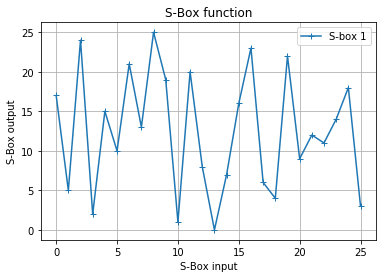

In [32]:
# plot one of the S-boxes
plt.plot(S_box[0],'+-',label='S-box 1')
plt.title('S-Box function')
plt.xlabel('S-Box input')
plt.ylabel('S-Box output')
plt.legend(loc='upper right')
plt.grid()
plt.show()

Observation: The plot above shows the S-Box output is a nonlinear function of the input.

### 2.h) P-table <a id="section2h"></a> 
The P-table is used to shuffle the characters of the half-block so that bigram relationships are altered.  The table is implemented as an array of values from 0 to 7 in a random order.  The P-table permutes the order of the output so that adjacent characters in the input message are no longer adjacent.  This thwarts bigram frequency analysis of the cipher text.  

$Y_i = \text{P_table}[X_i]$

The P-table is designed to shuffle and separate adjacent characters.  After 8 rounds, the P-table shuffle is back to the original order. 

In [33]:
# generator code
i = np.arange(0,block_size/2,dtype=np.uint8)
np.random.shuffle(i)
print(i)

[5 7 4 2 1 3 6 0]


In [34]:
# run the generator code above and copy the result to the P_table array once.
P_table = np.array([7, 2, 6, 5, 0, 4, 3, 1],dtype=np.uint8)
print(P_table)

[7 2 6 5 0 4 3 1]


### 2.i) Key schedule <a id="section2i"></a> 
The sub keys are generated from the encryption key.  The details are in the function gen_round_keys() located in myModule.py.  Half of the key is XORed with the other half and saved as an intermediate subkey a0.  The lower half key is rolled right by one and the upper half key is rolled left by one and the XORed together to form the intermediate subkey a1.  XOR of lower and upper halfs of the key was done to spread the key over both halfves of the data block to reduce sensitivity of the errors in the key to partial sucessful encryption.

The full key is rolled right by one fourth the block size then saved as the variable atemp. The variable atemp is divided into lower and upper parts and form the intermediate subkeys a2 and a3.  
 
The four constants, c0, c1, c2 and c3 were generated by using the digits of $\pi$.  The intermediate subkeys are then passed through the round function with the call $k_i = RF(a_i,c_i)$, where i is 0 to 3.  This generates the round keys.

At this point in the notebook, some global variables need to be saved to a file so that the other notebooks in this project can access these variables.  Also, there are several functions defined in myModule.py that make use of the variable block_size.  

In [35]:
# set the initialization vector for the project, used later in the CBC mode.  The IV is a set of random integers
IV = np.array([14,  1,  0, 21, 18,  4,  9, 23, 15, 24, 16, 17,  7, 13,  6, 20], dtype=np.uint8)  

In [36]:
# Saving some of the objects to use in other notebooks
with open('objs.pkl', 'wb') as f:
    pickle.dump([block_size,PT,PT_int,key,IV,Mixer,S_box,P_table,en_letter_freq], f)

Now we can load the myModule.py file which has the function definitions for this project.

In [37]:
from myModule import *

### 2.j) Round function <a id="section2j"></a> 
The round function, also called a Feistel function, as implemented in this project will loosely follow the DES implementation.  Within a Feistel network, the function can be almost any function. A simple pass through function or a one way hash function could be used.  Since we are not going to design a new function from scratch, we will just follow the DES round function with some modifications.  The use of the Mixer matrix is new and the implementation of S-box and the P-table are different.  

<img src='Feistel function.jpg' width="300"/>   
Figure 4: Block diagram of the round function, RF()    
     
The RF() function, shown in Figure 4, operates on half a block and consists of four stages:  
- Key mixing: the half block is combined with a subkey using the character XOR operation.
- Mixing: after mixing in the subkey, the Mixer matrix and the half block XOR subkey product are multiplied together with a dot multiplication matrix operation.  Each element of the resulting vector is a product and summation of several other characters from the input vector.   
- Substitution: after mixing, the block is processed by the S-boxes, or substitution boxes. Each element in the vector is replaced by a different character according to the lookup table.
- Permutation: finally, the character order of the half block is rearranged according to a fixed permutation table.

## 3) Design <a id="section3"></a>
myModule.py is a collection of functions used across several notebooks in this project is located in the file myModule.py.  The functions are documentation in the module.

myModule.py functions implement encryption and decryption operations using the Feistel network with a modified DES round function.  Encrypting one block at a time, where the blocks are encrypted independently of each other, is called Electronic codebook (ECB).  ECB encrypts identical plaintext blocks into identical ciphertext blocks and therefore this mode does not hide repeating patterns in the data.

Cipher block chaining (CBC) is a mode that XORs each block of plaintext with the previous block of ciphertext before being encrypted. The CBC mode hides repeating data in the message.  When encrypting data using CBC, an initialization vector can be used as the first block in the encryption process.

There are other modes of operation for block ciphers [20], but these will not be addressed in this project. 

## 4) Test message <a id="section4"></a>
The following code encrypts and decrypts the test message, first using the Electronic codebook (ECB) mode, then using the Cipher block chaining (CBC) is a mode.  

### Encrypt test message with Electronic codebook (ECB) mode

In [38]:
# display the cipher text as ascii characters
ct_ECB = encrypt_ECB(PT_int, key)
ct_ECB_ascii = (ct_ECB+ord('A')).tostring().decode('ascii') # convert back to ascii characters

string = ct_ECB_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

SCRRVMIUUTKPHQBRZPUSDAYWFSRFUKOZHOPGLKMRZCNMGBUEAJEJKVQDXGOODKNFVZWIPLLBZQG
GGMGMETUUZCZHFQYQVAILOUEPUCVLKSRIERFYCWVIGKPPGDUGLQRVZKRJLZJTINKMVABLLZTFPE
ZPYCZKIIQEUXORYXAEVVRITJRJVJGYDTIWGBTMGMLJHOESBWAGINXOZMWWAZCTWOKFENFPHBHOZ
KBGPBVRYWDSHCEJLJSIDHLZSPQYMKMDSWQYHXFSQROOOQNAJLIOYKPXPBZJVKMVUUZKJZKMVXSA
LVUKUWEJHXWYZNHMJRJVBNHMMGMVULUVCWOMATBFXHMYOUNJEGGIDJWVCCSODTNRZHGVKNQIKLO
QVBDARAGWLNCVFWNZAQTVXIQSZEMQFBZQOFXHDOQDCUXCQDUPSRDOZPTUEAQUVDOLFMYMIEYVNF
RYHDIXLEHLLNBHPUHBAFRRLXXLJJENXMAYNRBZFKGEKUFLBKBBJHVLRTSGZSBDFBQEBRPJZBWOL
VXQQZKVOOOZZANTXCGZZZXDTYYFQBWGSBNZDNHFUUIEEEKNEFMYISMRKZZEEZYTGANSQCFYPEVD
MDMGBYQDSREJNHSBQEIPWJDQSYPXRIWWYBBBHVQCRNEIJTNIIDZYYRMWJLZBQNIKRWWZQURZMXF
BLOIQLTJVZKVJVDLFMOUYHXUBMTAZDBRJFIPQNFWGMFNTZPPGLZSFZHCENZNXKKOKOSQFHSAOWK
BGIIZQUUNLWQWPSWNBHHGAZEMGZTIXFJQEFXUXEQIMBXKWNSSMBQHWCXOYXCBPQBNYQEFSSJBHZ
XXUSNSTWUUZZVSJDMRRNCMMGOCTBBFIQOCGEXCBCWTNRNCUBUDAPLEBGKSYMNHEXAFTWLNZXBQT
XADQDMYDTLVGXAQZRKDTJTSNMMDMLJUHJXNBUFDPDUQHBQYGJHNBAVCPTBCLDWYITILZWXQFJYG
RHUZSTFOATMX

### Decrypt test message with Electronic codebook (ECB) mode

In [39]:
pt_ECB = decrypt_ECB(ct_ECB, key)

pt_ECB_recvd_ascii = (pt_ECB+ord('A')).tostring().decode('ascii')

string = pt_ECB_recvd_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

### Encrypt test message with Cipher block chaining (CBC) mode
Normally the initialization vector (IV) would change form message to message, but in this project we are going to use a fixed IV.

In [40]:
ct_CBC_int = encrypt_CBC(PT_int,key,IV)

# convert back to ascii characters and display
ct_CBC_ascii = (ct_CBC_int+ord('A')).tostring().decode('ascii')

string = ct_CBC_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

PPVKERWGBMZDFXPWOEAJBELYWGIPZKKABJKUPZJVNCNOXWCKQZFTPEXAAZTMOEXSHZOZHMRKZDM
EFHYFSKGKQRGEAIPYGKQZSYBPQILDMTSVCRXKASTCCZCDSEXSBRNRSCIFJWVIAXRFCCOBJQVLPZ
FNESRTSOJOGVGWZUYNPLXIHLDNKMLGVUJCHYITYEYJFRLCWYYSOJMBYVFNAYSMVIBJUIMGUBEDS
OPJHCALRRFXLUCTSHFAXFWIVAGRDEZLZHWPKTNGURWRTASQFSKLSKLOMMDWGMJGPPGHYECOIPET
ATIJNKGROGBHJDWXBWJFTSULTQKIISTHSYSQYLPBCBQEYDIDGKNXNBAAOOKXFZYCBJQZLSYVCAZ
SGOZFOHAPFCVNQAVBDTHXHVEXGSFVQEFQOHHOVJXYTPTZZCSVKWAHZPLUTIWVZXBUNYYHUXHTJO
EBBXPEYRSWKCUHRTRQPZSEALHPZDFHGRKQTWDQNXAYKHOLSUDXREXOMVDVZCWOXUYCQDTNCRIFR
WXSITYYCORLYRQZHCXNEDEYMIHVHIWKYNQFZALWWFYTAPMHPBDOODCOUTTAZFEWSHANDCYRVZCL
TVWLNRZTZJZAJHTBARJJFYIRELZBQICTGASLQJELOIJKPFZALZPGXEBHTJBLDIYLJGVSGAUCLZK
IFYMINEBGHJAJGCYZBGAIBUWAGSZVQJZVFOPXNYRQYNZRGRHDJLAWSAYFSHKHATASNHGBMOMKGD
HGCYMSABCZXNNUHXBTZOCUYCSDMFOBYDMGPZALKUNFHCVZMEXGMNBMHIDTBYULXWDOLOSQBINVM
XYMMVBDAKHVKFEECPJOYZHMGRLVIBGFRQACUXJSTMHIYLBBBQWXRPZDVGOEOJZSPLMBNEGQYIRV
USYZHFYFSEEBWUJPUKNBBKILWNEUXDQFBDQUQQFFILPAIEFQQPMESCBKUHHCFIBGYGSVYFVFRTJ
UBKBUPDYCVLJ

### Decrypt test message with Cipher block chaining (CBC) mode

In [41]:
pt_CBC_int = decrypt_CBC(ct_CBC_int,key,IV)

# convert back to ascii characters and display
pt_CBC_ascii = (pt_CBC_int+ord('A')).tostring().decode('ascii')

string = pt_CBC_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

## 5) Algorithm analysis <a id="section5"></a>
Moved to a new notebook.

## 6) Security Analysis <a id="section6"></a> 
Moved to a new notebook.


## 7) Conclusion <a id="section7"></a>
TBD

## 8) References <a id="section8"></a>
1. Wikipedia contributors. (2021, January 11). Encryption. In Wikipedia, The Free Encyclopedia. Retrieved 17:22, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Encryption
2. David Oranchak, "Let's Crack Zodiac-Episode 5 - The 340 Is Solved!", Dec 11, 2020, https://www.youtube.com/watch?v=-1oQLPRE21o&t=283s
3. David Oranchak, "Let's Crack Zodiac-Episode 3 - The 408", Sep 1, 2020, https://www.youtube.com/watch?v=57o8g3d6lSw
4. Wikipedia contributors. (2020, December 17). Playfair cipher. In Wikipedia, The Free Encyclopedia. Retrieved 01:46, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Playfair_cipher
5. Wikipedia contributors. (2021, January 7). Enigma machine. In Wikipedia, The Free Encyclopedia. Retrieved 14:51, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Enigma_machine
6. Wikipedia contributors. (2021, January 8). Feistel cipher. In Wikipedia, The Free Encyclopedia. Retrieved 14:52, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Feistel_cipher
7. Wikipedia contributors. (2020, December 25). Data Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 15:02, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Data_Encryption_Standard
8. Wikipedia contributors. (2021, January 5). Block cipher. In Wikipedia, The Free Encyclopedia. Retrieved 15:04, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Block_cipher
9. Wikipedia contributors. (2021, January 8). Gallic Wars. In Wikipedia, The Free Encyclopedia. Retrieved 02:10, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Gallic_Wars
10. Wikipedia contributors. (2021, January 8). Commentarii de Bello Gallico. In Wikipedia, The Free Encyclopedia. Retrieved 02:11, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Commentarii_de_Bello_Gallico
11. Wikipedia contributors. (2021, January 4). Kryptos. In Wikipedia, The Free Encyclopedia. Retrieved 15:15, January 15, 2021, from https://en.wikipedia.org/w/index.php?title=Kryptos
12. Wikipedia contributors. (2020, December 18). Caesar cipher. In Wikipedia, The Free Encyclopedia. Retrieved 02:11, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Caesar_cipher
13. Wikipedia contributors. (2020, December 13). Bigram. In Wikipedia, The Free Encyclopedia. Retrieved 02:42, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Bigram
14. Wikipedia contributors. (2021, January 4). ASCII. In Wikipedia, The Free Encyclopedia. Retrieved 13:52, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=ASCII
15. Wikipedia contributors. (2021, February 8). Rijndael MixColumns. In Wikipedia, The Free Encyclopedia. Retrieved 11:04, February 8, 2021, from https://en.wikipedia.org/w/index.php?title=Rijndael_MixColumns
16. Wikipedia contributors. (2021, February 4). MDS matrix. In Wikipedia, The Free Encyclopedia. Retrieved 11:48, February 8, 2021, from https://en.wikipedia.org/w/index.php?title=MDS_matrix
17. Wikipedia contributors. (2021, January 7). S-box. In Wikipedia, The Free Encyclopedia. Retrieved 14:32, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=S-box
18. Wikipedia contributors. (2020, December 25). Data Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 14:30, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=Data_Encryption_Standard
19. Wikipedia contributors. (2021, January 7). Advanced Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 14:31, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=Advanced_Encryption_Standard
20. Wikipedia contributors. (2021, January 4). Block cipher mode of operation. In Wikipedia, The Free Encyclopedia. Retrieved 13:41, January 14, 2021, from https://en.wikipedia.org/w/index.php?title=Block_cipher_mode_of_operation
21. NIST Special Publication 800-22, A Statistical Test Suite for Random and Pseudorandom Number Generators for Cryptographic Applications, Revision 1a, April 2010